ZHONG YUCHEN

# 3I026 - Intelligence artificielle & Data science

# TP 3 - Perceptron

L'objectif est d'implanter l'algorithme du perceptron de Rosenblatt, ainsi que quelques extensions, et d'évaluer leurs performances sur des données aléatoires puis réelles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Rappels sur les TPs précédent

In [2]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [3]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc

In [4]:
class ClassifierRandom(Classifier):
    def __init__(self, dim):
        self.w = np.random.rand(dim)

    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1

In [5]:
def plot_frontiere(set, classifier, step=20):
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)

## Étape 1 : Perceptron de Rosenblatt


En héritant de la classe `Classifier`, implanter le perceptron tel que décrit en cours. La fonction `train` fera une itération sur l'ensemble des données de l'apprentissage. Les points d'apprentissage seront tirés dans un ordre aléatoire.

In [43]:
import random
class Perceptron(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_iterations):
        self.input_dimension = input_dimension
        self.w = np.random.rand(input_dimension)
        self.n = learning_rate
        self.nb_Iteration = nombre_iterations
    
    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1
    
    def train(self, labeledSet):
        self.labeledSet = labeledSet
        i = 0 
        while (i < self.nb_Iteration):
            index_aleatoire = random.randint(0,labeledSet.size()-1)
            if(labeledSet.getY(index_aleatoire)*self.predict(labeledSet.getX(index_aleatoire)) < 0 ): # Yifw(x) < 0 x est mal classé
                    self.w = self.w+self.n*labeledSet.getY(index_aleatoire)*labeledSet.getX(index_aleatoire)
            i +=1
        

La méthode `train` devra faire un nombre d'itérations fixées à la création de l'objet.

Pour pouvoir évaluer la qualité de l'apprentissage au cours des itérations, on évaluera régulièrement (par exemple toutes les 10 itérations) l'accuracy du modèle, sur un ensemble de validation (un sous-ensemble de l'ensemble d'apprentissage). 

Après chaque apprentissage, on veillera à tracer la courbe d'apprentissage, c'est à dire le score obtenu au cours des itérations, et à tracer la frontière de décision.

Tester votre code sur des données aléatoires.

In [44]:
def generer_exemple(mean=0):
    """Genere un exemple"""
    mean = [mean, mean]
    cov = [[1, 0], [0, 6]]
    return np.random.multivariate_normal(mean, cov)

def generer_exemples(nombre_exemples, mean=0):
    """ Genere une liste de taille 'nombre_exemple' d'exemples """
    exemples = list()
    for _ in range(nombre_exemples):
        exemples.append(generer_exemple(mean))   
    return exemples

def ajouter_exemples_aleatoires(the_set, nombre_exemples, mean, labels):
    """ Ajoute dans 'the_set' un total de 'nombre_exemples' exemples
    associés aleatoirement à un label contenu dans 'labels'. """
    from random import choice
    exemples = generer_exemples(nombre_exemples, mean)
    for exemple in exemples:
        the_set.addExample(exemple, choice(labels))
        
set_appren = LabeledSet(2)
ajouter_exemples_aleatoires(set_appren, 100, -2, [-1])
ajouter_exemples_aleatoires(set_appren, 100, 2, [1])

set_test = LabeledSet(2)
ajouter_exemples_aleatoires(set_test, 200, -2.5, [-1])
ajouter_exemples_aleatoires(set_test, 200, 2.5, [1])

In [45]:
# Permet d'afficher les figures directement dans le notebook:
%matplotlib inline

def plot2DSet(dataset):
    plt.scatter(dataset.x[0:int(dataset.size()/2),0],dataset.x[0:int(dataset.size()/2),1],marker='o')
    plt.scatter(dataset.x[int(dataset.size()/2):dataset.size(),0],dataset.x[int(dataset.size()/2):dataset.size(),1],marker='x')


0.9875


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


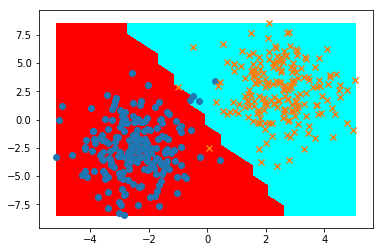

In [46]:
#Faire apprendre le modele
p = Perceptron(2,0.001,10)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))


1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


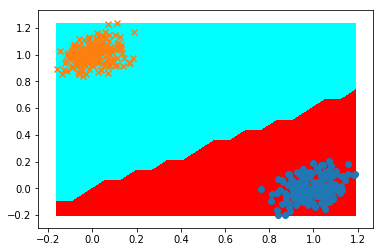

In [59]:
#Faire apprendre le modele
p = Perceptron(2,0.5,10)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))



**Questions**
- Comment choisir le nombre d'itérations ?
- Quelle est l'influence du paramètre `learning_rate`
- Que se passe-t-il si le nombre d'exemple d'apprentissage est faible ?

Il faut choisir le nombre d'itération de mannière à évider le sur-apprentissage et le sous-apprentissage!

Plus que learning_rate soit élevée, plus que l'apprentissage de modèle soit rapidement meilleur, mais plus que l'importance par rapport au moèdele d'un seul exemplaire auguemente !

Si le nombre d'exemple d'apprentissage est faible, l'apprentissage de modèle sera amélioré faiblement en manqueant d'exactitude !

## Étape 2: Données XOR

Générer une base de données, appelée XOR par la suite, contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à des exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à des exemples négatifs

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


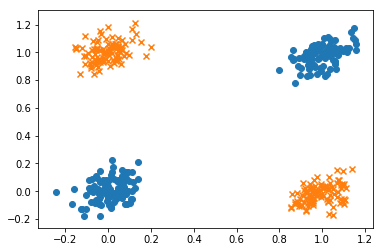

In [60]:
def generer_exemple(mean=0):
    """Genere un exemple"""
    cov = [[0.001, 0.005], [0.006, 0.003]] # plus que la covariance soit petite, plus que les points soient centralisées
    return np.random.multivariate_normal(mean, cov)

def generer_exemples(nombre_exemples, mean=0):
    """ Genere une liste de taille 'nombre_exemple' d'exemples """
    exemples = list()
    for _ in range(nombre_exemples):
        exemples.append(generer_exemple(mean))   
    return exemples

def ajouter_exemples_aleatoires(the_set, nombre_exemples, mean, labels):
    """ Ajoute dans 'the_set' un total de 'nombre_exemples' exemples
    associés aleatoirement à un label contenu dans 'labels'. """
    from random import choice
    exemples = generer_exemples(nombre_exemples, mean)
    for exemple in exemples:
        the_set.addExample(exemple, choice(labels))

the_set= LabeledSet(2)
ajouter_exemples_aleatoires(the_set, 100, [0,0], [1])
ajouter_exemples_aleatoires(the_set, 100, [1,1], [1])
ajouter_exemples_aleatoires(the_set, 100, [1,0], [-1])
ajouter_exemples_aleatoires(the_set, 100, [0,1], [-1])
#Dessiner 
plot2DSet(the_set)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


0.625


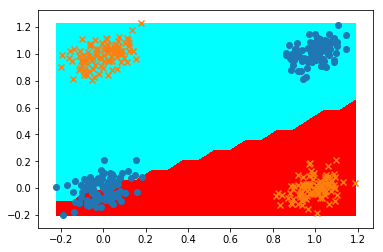

In [61]:
#on donne les ensembles de test
set_test= LabeledSet(2)
ajouter_exemples_aleatoires(set_test, 100, [0,0], [1])
ajouter_exemples_aleatoires(set_test, 100, [1,1], [1])
ajouter_exemples_aleatoires(set_test, 100, [1,0], [-1])
ajouter_exemples_aleatoires(set_test, 100, [0,1], [-1])
#Faire apprendre le modele
p = Perceptron(2,0.5,10)
p.train(the_set)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

**Questions**
- Que se passe-t-il quand on apprend un perceptron ?
- Quel est le problème ?

Comme l'on voit, la frontière de deux classification n'arrive pas à séparer les 4 ensembles des exemples, et l'exactitude de ce modèle est assez mauvaise. 

Le problème est que on ne pourras pas séparer les points par une ligne dans 2 dimensions.

## Étape 4: Protocole expérimental

Attention, lorsque vous testez un classifieur, il est nécessaire de considérer à la fois un ensemble d'apprentissage et un ensemble de test. La performance doit être évaluée sur l'ensemble de test (et non pas sur l'ensemble d'apprentissage).

Évaluer les performances du perceptron selon différentes valeurs des hyper-paramètres (*learning rate*, nombre d'itérations), tracer les courbes d'apprentissage et les frontières de décisions. Commenter.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


0.4625


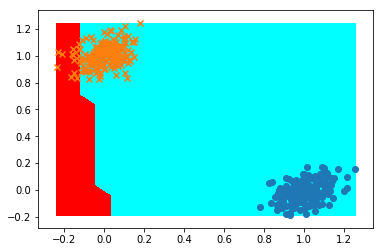

In [128]:
set_appren= LabeledSet(2)
ajouter_exemples_aleatoires(set_appren, 100, [0,0], [1])
ajouter_exemples_aleatoires(set_appren, 100, [1,0], [-1])

set_test = LabeledSet(2)
ajouter_exemples_aleatoires(set_test, 200, [1,0], [-1])
ajouter_exemples_aleatoires(set_test, 200, [0,1], [1])

#Faire apprendre le modele
p = Perceptron(2,0.001,10)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

Ici on commence par varier le hyper_paramètre learning_rate !!!

0.5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


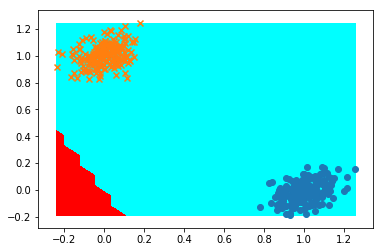

In [129]:
#Faire apprendre le modele
p = Perceptron(2,0.01,10)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


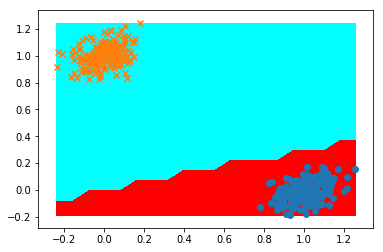

In [131]:
#Faire apprendre le modele
p = Perceptron(2,0.1,10)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

#### on a varié le learnning_rate, et comme on avait dit avant, plus que le learning_rate soit élevé, plus que le modèle apprend rapidement meilleur!!


Ici on commence par varier le super_paramètre nombre d'itération !!

0.5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


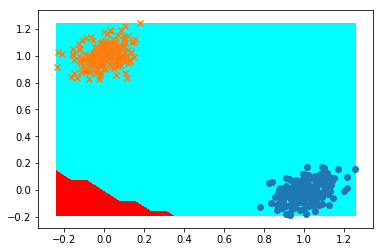

In [132]:
#Faire apprendre le modele
p = Perceptron(2,0.001,50)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

0.86


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


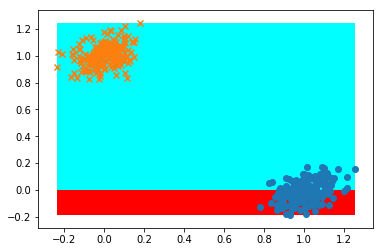

In [137]:
#Faire apprendre le modele
p = Perceptron(2,0.001,100)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

0.5975


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


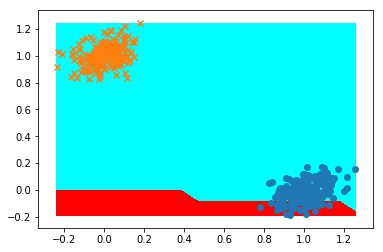

In [139]:
#Faire apprendre le modele
p = Perceptron(2,0.001,150)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


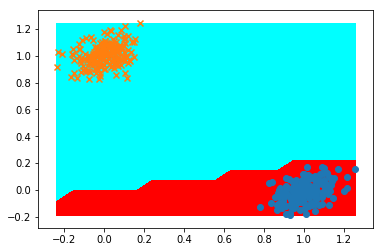

In [140]:
#Faire apprendre le modele
p = Perceptron(2,0.001,2000)
p.train(set_appren)
#Tester le modele
plot_frontiere(set_test,p)
plot2DSet(set_test)
print(p.accuracy(set_test))

#### il faut vraiment augumenter le nombre d'itération quand le learning_rate est assez petit, mais il nous a besoin de choisir un nombre adapté afin d'éviter le sur-apprentissage

Tracer des courbes indiquant les performances en fonction des hyper-paramètres. Commenter.

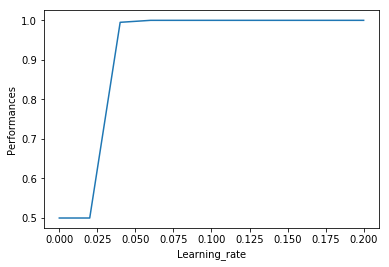

In [142]:
var_rate = 0
data_rate = []
index = []
while (var_rate < 0.20) :
    p = Perceptron(2,var_rate,60)
    p.train(set_appren)
    data_rate.append(p.accuracy(set_test))
    index.append(var_rate)
    var_rate +=0.02
df = pd.DataFrame({'Learning_rate':index, 'Performances' : data_rate})
plt.plot(df['Learning_rate'],df['Performances'])
plt.xlabel('Learning_rate')
plt.ylabel('Performances')
plt.show()
#On trouve un schéma bien évidement représenté (comme tirer aléatoirment )

### Voici le schéma : la performance varie selon l'augumente de hyper-paramètre Learning_rate en tirant aléatoirement les points

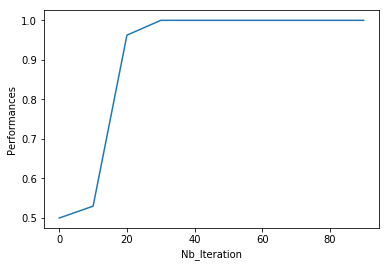

In [146]:
nb_Iteration = 0
data_nb = []
index = []
while (nb_Iteration < 100) :
    p = Perceptron(2,0.1,nb_Iteration)
    p.train(set_appren)
    data_nb.append(p.accuracy(set_test))
    index.append(nb_Iteration)
    nb_Iteration +=10
df = pd.DataFrame({'Nb_Iteration':index, 'Performances' : data_nb})
plt.plot(df['Nb_Iteration'],df['Performances'])
plt.xlabel('Nb_Iteration')
plt.ylabel('Performances')
plt.show()
#On trouve un schéma bien évidement représenté (comme tirer aléatoirment )

### Voici le schéma : la performance varie selon l'augumente de hyper-paramètre Nb_Iteration en tirant aléatoirement les points

## Étape 5 : données réelles UCI

In [148]:
from sklearn.datasets import fetch_mldata

def loadFile(name):
    data = fetch_mldata(name, data_home='.')
    print(data.data.shape)
    unique=np.unique(data.target)
    for i in range(len(data.target)):
        if (data.target[i]==unique[0]):
            data.target[i]=1
        else:
            data.target[i]=-1
    return data
data = loadFile('breast-cancer_scale')

(683, 10)


In [149]:
def split (data,n):
    taille=int(len(data.data)*n)
    #print(len(data.data))
    i=0
    data_1=[]
    label_1=[]
    data_2=[]
    label_2=[]
    while (i<taille):
        data_1.append(data.data[i])
        label_1.append(data.target[i])
        i=i+1
    #print(i)
    while (i<len(data.data)):
        data_2.append(data.data[i])
        label_2.append(data.target[i])
        i=i+1
    #print(i)
    return (data_1,label_1,data_2,label_2)
    
a=split(data,0.5)

Sur ces données réelles, évaluer les performances du perceptron, selon la valeur des hyper-paramètres et comparer aux performances de $k$-NN (avec plusieurs valeurs de $k$. Réfléchir à une façon de choisir la meilleur valeur des hyper-paramètres.

In [150]:
from math import *
from sklearn.neighbors import KNeighborsClassifier

class KNN(Classifier):
    def __init__(self, input_dimension,n):
        self.input_dimension=input_dimension
        self.n=n
        
    def distance(self,a,b):
        sommeCarre = 0
        for i in range(len(a)) :
            sommeCarre += (a[i] - b[i])**2
            
        d = sqrt(sommeCarre)
        return d
    
    def train(self,dataset):
        self.data=dataset
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        distance=[]
        taille=self.data.size()
        i=0
        while (i<taille):
            point=self.data.getX(i)
            distance.append(self.distance(x,point))
            i=i+1
        #tableau des indices des valeurs par ordre croissant
        distance_arg=np.argsort(distance)
        i=0
        label1=0
        label2=0
        while (i<self.n):
            if (self.data.getY(distance_arg[i])==1):
                label1=label1+1
            if (self.data.getY(distance_arg[i])==-1):
                label2=label2+1
            i=i+1
        #si il y a plus de 1
        if (label1>=label2):
            res=1
            return res
        #si il y a plus de -1
        if (label2>label1):
            res=-1
            return res

In [151]:
apprentissage = LabeledSet(2)
test = LabeledSet(2)

i=0
for point in a[0]:
    apprentissage.addExample(point,a[1][i])
    i=i+1

i=0
for point in a[2]:
    test.addExample(point,a[3][i])
    i=i+1
    
print(apprentissage.getX(1))
print(apprentissage.getY(1))

[-0.859671 -0.111111 -0.333333 -0.333333 -0.111111  0.333333  1.
 -0.555556 -0.777778 -1.      ]
[1]


In [153]:
#Learning rate fixé à 0.02, nb itér variable
perce_test_25_1 = Perceptron(10,0.02,25)
perce_test_50_1 = Perceptron(10,0.02,50)
perce_test_75_1 = Perceptron(10,0.02,75)
perce_test_100_1 = Perceptron(10,0.02,100)
perce_test_125_1 = Perceptron(10,0.02,125)

#Nb itér fixé à 10 , learning rate variable
perce_test_0_2 = Perceptron(10,0.02,10)
perce_test_4_2 = Perceptron(10,0.05,10)
perce_test_8_2 = Perceptron(10,0.07,10)
perce_test_12_2 = Perceptron(10,0.10,10)
perce_test_16_2 = Perceptron(10,0.12,10)

#N-voisins variable knn
knn_test_2 = KNN(10, 2)
knn_test_5 = KNN(10, 5)
knn_test_10 = KNN(10, 10)
knn_test_15 = KNN(10, 15)
knn_test_20 = KNN(10, 20)

#Train
perce_test_25_1.train(apprentissage)
perce_test_50_1.train(apprentissage)
perce_test_75_1.train(apprentissage)
perce_test_100_1.train(apprentissage)
perce_test_125_1.train(apprentissage)

perce_test_0_2.train(apprentissage)
perce_test_4_2.train(apprentissage)
perce_test_8_2.train(apprentissage)
perce_test_12_2.train(apprentissage)
perce_test_16_2.train(apprentissage)

knn_test_2.train(apprentissage)
knn_test_5.train(apprentissage)
knn_test_10.train(apprentissage)
knn_test_15.train(apprentissage)
knn_test_20.train(apprentissage)

listAccuracy_test_perce_nbit = [perce_test_25_1.accuracy(test), perce_test_50_1.accuracy(test)
                      ,perce_test_75_1.accuracy(test)
                      ,perce_test_100_1.accuracy(test)
                      ,perce_test_125_1.accuracy(test)]

listAccuracy_test_perce_learate = [perce_test_0_2.accuracy(test), perce_test_4_2.accuracy(test)
                      ,perce_test_8_2.accuracy(test)
                      ,perce_test_12_2.accuracy(test)
                      ,perce_test_16_2.accuracy(test)]


listAccuracy_test_knn = [knn_test_2.accuracy(test), knn_test_5.accuracy(test)
                      ,knn_test_10.accuracy(test)
                      ,knn_test_15.accuracy(test)
                      ,knn_test_20.accuracy(test)]

print("Perceptron:", listAccuracy_test_perce_nbit)
print("Perceptron:", listAccuracy_test_perce_learate)
print("KNN:", listAccuracy_test_knn)

Perceptron: [0.11403508771929824, 0.9064327485380117, 0.9152046783625731, 0.9619883040935673, 0.956140350877193]
Perceptron: [0.0847953216374269, 0.06432748538011696, 0.09649122807017543, 0.5467836257309941, 0.9678362573099415]
KNN: [0.9766081871345029, 0.9824561403508771, 0.9883040935672515, 0.9883040935672515, 0.9853801169590644]


Choisir le couple nb_itération et learning rate élevé de manière à avoir une bonne accuracy. (Ne pas prendre de trop grosse valeur non plus pour eviter le sur-apprentissage)


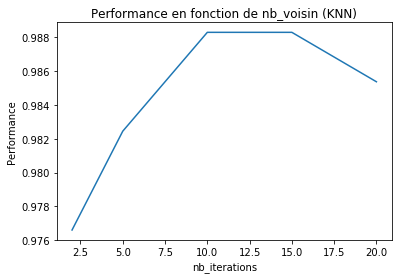

In [161]:
plt.title("Performance en fonction de nb_voisin (KNN)")
plt.plot([2,5,10,15,20],listAccuracy_test_knn)
plt.xlabel('nb_iterations')
plt.ylabel('Performance')
plt.show()


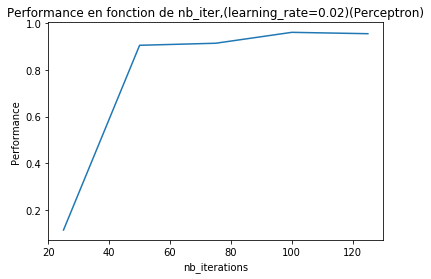

In [162]:
plt.title("Performance en fonction de nb_iter,(learning_rate=0.02)(Perceptron)")
plt.plot([25,50,75,100,125],listAccuracy_test_perce_nbit)
plt.xlabel('nb_iterations')
plt.ylabel('Performance')
plt.show()

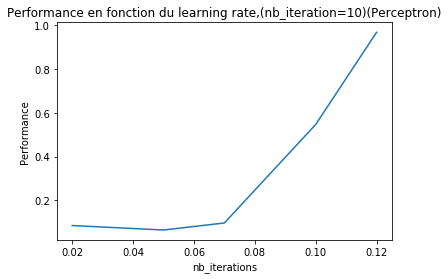

In [160]:
plt.title("Performance en fonction du learning rate,(nb_iteration=10)(Perceptron)")
plt.plot([0.02,0.05,0.07,0.10,0.12],listAccuracy_test_perce_learate)
plt.xlabel('nb_iterations')
plt.ylabel('Performance')
plt.show()